In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import norm
from pylab import figure, cm
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
#field='baryon_density'
#field='temperature'
field='tau_real'

#folder='native_fields' 
folder='derived_fields' 

coarse_path = '/pscratch/sd/z/zarija/MLHydro/L80_N512_z3_s1.hdf5'
coarse = h5py.File(coarse_path, 'r')
coarse_field = coarse[folder][field][0,:,:]

infer_path = '/pscratch/sd/z/zarija/MLHydro/infer_vanilla_512.hdf5'
infer = h5py.File(infer_path, 'r')
infer_field = infer[folder][field][8,:,:]

fine_path = '/pscratch/sd/z/zarija/MLHydro/fine_512.hdf5'
fine = h5py.File(fine_path, 'r')
fine_field = fine[folder][field][0,:,:]


<ipython-input-8-328c181a9135>:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


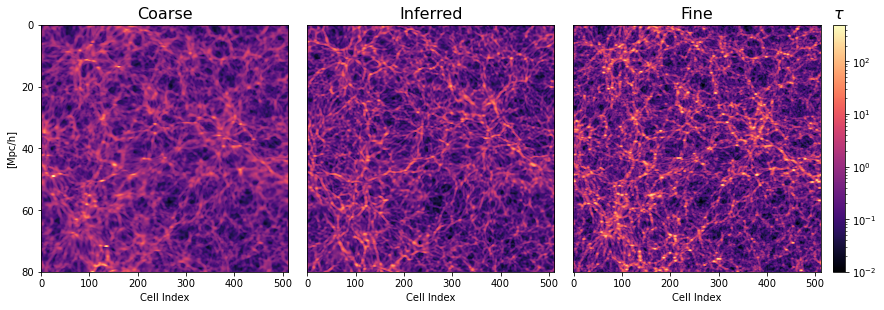

In [8]:
size = 80
shape = 512


if field == 'temperature': thisNorm = LogNorm(vmin=2e3, vmax=1e7)
elif field == 'tau_real': thisNorm = LogNorm(vmin=1e-2, vmax=5e2)
else: thisNorm = LogNorm(vmin=5e-2, vmax=1e3)

x_label_list = ['0', '20', '40', '60', '80']

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.04], height_ratios=[1])


#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(coarse_field, cmap=cm.magma, norm=thisNorm)
ax0.set_title('Coarse', fontsize=16)
ax0.set_yticks([0, 20/size*shape,40/size*shape,60/size*shape,80/size*shape])
ax0.set_yticklabels(x_label_list)
ax0.set_ylabel('[Mpc/h]')
ax0.set_xlabel('Cell Index')
ax0.set_box_aspect(1)


ax1 = fig.add_subplot(gs[0, 1])
im = ax1.imshow(infer_field, cmap=cm.magma, norm=thisNorm)
ax1.set_box_aspect(1)
ax1.set_title('Inferred', fontsize=16)

ax1.set_xlabel('Cell Index')
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

ax2 = fig.add_subplot(gs[0, 2])
im = ax2.imshow(fine_field, cmap=cm.magma, norm=thisNorm)
ax2.set_box_aspect(1)
ax2.set_title('Fine', fontsize=16)

ax2.set_xlabel('Cell Index')
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins = inset_axes(ax2,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

cbar1 = plt.colorbar(im, cax=axins)

if field == 'temperature': axins.set_title(r'$T$',fontsize=16)
elif field == 'tau_real': axins.set_title(r'$\tau$',fontsize=16)
else: axins.set_title(r'$\rho$',fontsize=16)



plt.tight_layout()
if field == 'temperature': fig.savefig('temp_comp.png', bbox_inches='tight')
elif field == 'tau_real': fig.savefig('tau_comp.png', bbox_inches='tight')
else: fig.savefig('rho_comp.png', bbox_inches='tight')

plt.show()

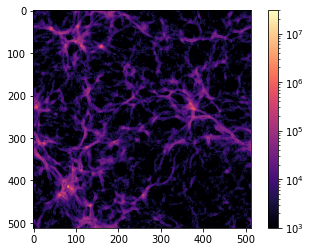

In [81]:
sub = fine_field - coarse_field
im = plt.imshow(np.abs(sub), cmap=cm.magma, norm=LogNorm(vmin=1e3, vmax=3e7))
plt.colorbar(im)

In [40]:
a_rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_4096rhob_pdf.txt')
a_rho_pdf = np.delete(a_rho_pdf, np.argwhere(a_rho_pdf[:,3]==0), 0)
b_rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_512rhob_pdf.txt')
b_rho_pdf = np.delete(b_rho_pdf, np.argwhere(b_rho_pdf[:,3]==0), 0)
c_rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_inferrhob_pdf.txt')
c_rho_pdf = np.delete(c_rho_pdf, np.argwhere(c_rho_pdf[:,3]==0), 0)
d_rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_finerhob_pdf.txt')
d_rho_pdf = np.delete(d_rho_pdf, np.argwhere(d_rho_pdf[:,3]==0), 0)

a_rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_4096rhob_ps3d.txt')
b_rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_512rhob_ps3d.txt')
c_rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_inferrhob_ps3d.txt')
d_rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_finerhob_ps3d.txt')





a_vz_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_4096vz_pdf.txt')
a_vz_pdf = np.delete(a_vz_pdf, np.argwhere(a_vz_pdf[:,3]==0), 0)
b_vz_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_512vz_pdf.txt')
b_vz_pdf = np.delete(b_vz_pdf, np.argwhere(b_vz_pdf[:,3]==0), 0)
c_vz_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_infervz_pdf.txt')
c_vz_pdf = np.delete(c_vz_pdf, np.argwhere(c_vz_pdf[:,3]==0), 0)
d_vz_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_finevz_pdf.txt')
d_vz_pdf = np.delete(d_vz_pdf, np.argwhere(d_vz_pdf[:,3]==0), 0)

a_vz_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_4096vz_ps3d.txt')
b_vz_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_512vz_ps3d.txt')
c_vz_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_infervz_ps3d.txt')
d_vz_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_finevz_ps3d.txt')




a_temp_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_4096temp_pdf.txt')
a_temp_pdf = np.delete(a_temp_pdf, np.argwhere(a_temp_pdf[:,3]==0), 0)
b_temp_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_512temp_pdf.txt')
b_temp_pdf = np.delete(b_temp_pdf, np.argwhere(b_temp_pdf[:,3]==0), 0)
c_temp_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_infertemp_pdf.txt')
c_temp_pdf = np.delete(c_temp_pdf, np.argwhere(c_temp_pdf[:,3]==0), 0)
d_temp_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_finetemp_pdf.txt')
d_temp_pdf = np.delete(d_temp_pdf, np.argwhere(d_temp_pdf[:,3]==0), 0)


a_temp_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_4096temp_ps3d.txt')
b_temp_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_512temp_ps3d.txt')
c_temp_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_infertemp_ps3d.txt')
d_temp_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_finetemp_ps3d.txt')




a_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_4096_z_flux_pdf.txt')
b_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_512_z_flux_pdf.txt')
c_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_infer_z_flux_pdf.txt')
d_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_fine_z_flux_pdf.txt')

a_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_4096_z_flux_ps1d.txt')
b_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_512_z_flux_ps1d.txt')
c_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_infer_z_flux_ps1d.txt')
d_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_fine_z_flux_ps1d.txt')



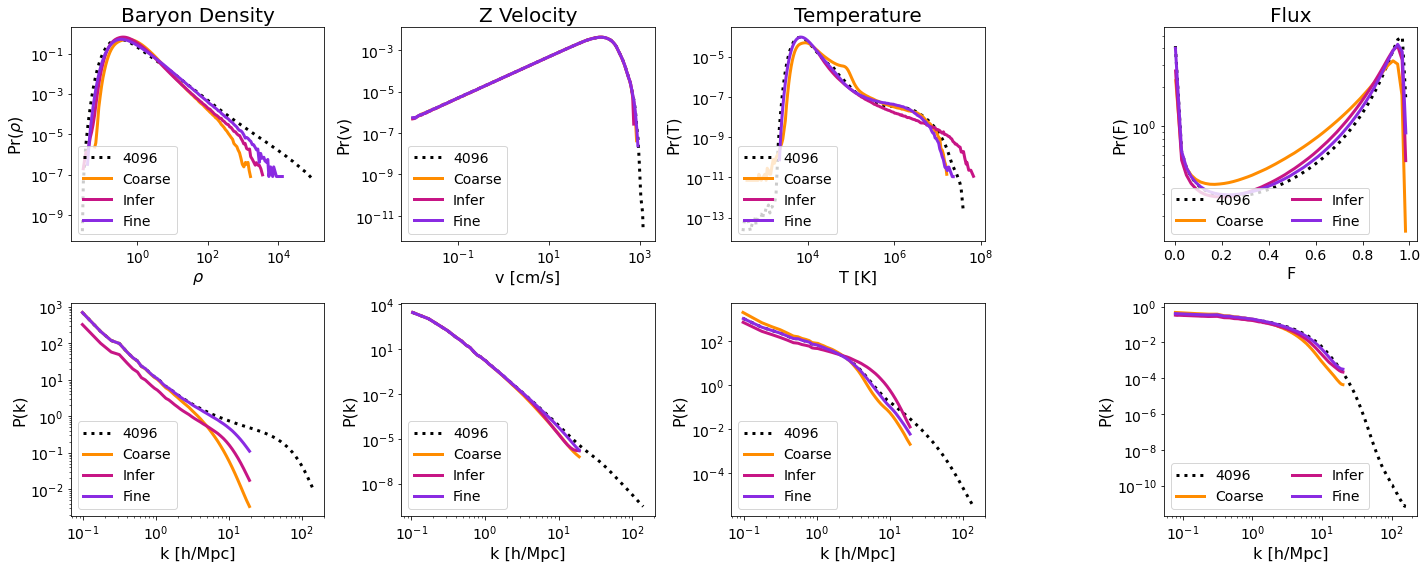

In [50]:
w=3
#p='#822581'
#o='#fd9e6c'
k='#000000'
o='darkorange'
p='mediumvioletred'
b='blueviolet'
ts=20
ls=16
tick=14
infer = True

fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(2, 5, width_ratios=[1,1,1,0.1,1], height_ratios=[1,1])

ax0 = fig.add_subplot(gs[0, 0])

ax0.plot(a_rho_pdf[:,2], a_rho_pdf[:,3], ':', label='4096', c=k, lw=w)
ax0.plot(b_rho_pdf[:,2], b_rho_pdf[:,3], label='Coarse', c=o, lw=w)
if infer: ax0.plot(c_rho_pdf[:,2], c_rho_pdf[:,3], label='Infer', c=p, lw=w)
ax0.plot(d_rho_pdf[:,2], d_rho_pdf[:,3], label='Fine', c=b, lw=w)

ax0.set_xlabel(r'$\rho$', fontsize=ls)
ax0.set_ylabel(r'Pr($\rho$)', fontsize=ls)
ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.set_title('Baryon Density', fontsize=ts)
ax0.tick_params(axis='x', labelsize=tick)
ax0.tick_params(axis='y', labelsize=tick)
ax0.legend(loc='lower left', fontsize=tick)

ax4 = fig.add_subplot(gs[1, 0])
ax4.plot(a_rho_3dps[:,2], a_rho_3dps[:,3], ':', label='4096', c=k, lw=w)
ax4.plot(b_rho_3dps[:,2], b_rho_3dps[:,3], label='Coarse', c=o, lw=w)
if infer: ax4.plot(c_rho_3dps[:,2], c_rho_3dps[:,3], label='Infer', c=p, lw=w)
ax4.plot(d_rho_3dps[:,2], d_rho_3dps[:,3], label='Fine', c=b, lw=w)

ax4.set_xlabel('k [h/Mpc]', fontsize=ls)
ax4.set_ylabel('P(k)', fontsize=ls)
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.tick_params(axis='x', labelsize=tick)
ax4.tick_params(axis='y', labelsize=tick)
ax4.legend(loc='lower left', fontsize=tick)

ax1 = fig.add_subplot(gs[0, 1])

ax1.plot(a_vz_pdf[:,2], a_vz_pdf[:,3], ':', label='4096', c=k, lw=w)
ax1.plot(b_vz_pdf[:,2], b_vz_pdf[:,3], label='Coarse', c=o, lw=w)
if infer: ax1.plot(c_vz_pdf[:,2][0:163], c_vz_pdf[:,3][0:163], label='Infer', c=p, lw=w)
ax1.plot(d_vz_pdf[:,2], d_vz_pdf[:,3], label='Fine', c=b, lw=w)

ax1.set_xlabel('v [cm/s]', fontsize=ls)
ax1.set_ylabel('Pr(v)', fontsize=ls)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Z Velocity', fontsize=ts)
ax1.tick_params(axis='x', labelsize=tick)
ax1.tick_params(axis='y', labelsize=tick)
ax1.legend(loc='lower left', fontsize=tick)

ax5 = fig.add_subplot(gs[1, 1])
ax5.plot(a_vz_3dps[:,2], a_vz_3dps[:,3], ':', label='4096', c=k, lw=w)
ax5.plot(b_vz_3dps[:,2], b_vz_3dps[:,3], label='Coarse', c=o, lw=w)
if infer: ax5.plot(c_vz_3dps[:,2], c_vz_3dps[:,3], label='Infer', c=p, lw=w)
ax5.plot(d_vz_3dps[:,2], d_vz_3dps[:,3], label='Fine', c=b, lw=w)

ax5.set_xlabel('k [h/Mpc]', fontsize=ls)
ax5.set_ylabel('P(k)', fontsize=ls)
ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.tick_params(axis='x', labelsize=tick)
ax5.tick_params(axis='y', labelsize=tick)
ax5.legend(loc='lower left', fontsize=tick)

ax2 = fig.add_subplot(gs[0, 2])

ax2.plot(a_temp_pdf[:,2], a_temp_pdf[:,3], ':', label='4096', c=k, lw=w)
ax2.plot(b_temp_pdf[:,2], b_temp_pdf[:,3], label='Coarse', c=o, lw=w)
if infer: ax2.plot(c_temp_pdf[:,2][31:192], c_temp_pdf[:,3][31:192], label='Infer', c=p, lw=w)
ax2.plot(d_temp_pdf[:,2], d_temp_pdf[:,3], label='Fine', c=b, lw=w)


ax2.set_xlabel('T [K]', fontsize=ls)
ax2.set_ylabel('Pr(T)', fontsize=ls)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Temperature', fontsize=ts)
ax2.tick_params(axis='x', labelsize=tick)
ax2.tick_params(axis='y', labelsize=tick)
ax2.legend(loc='lower left', fontsize=tick)

ax6 = fig.add_subplot(gs[1, 2])
ax6.plot(a_temp_3dps[:,2], a_temp_3dps[:,3], ':', label='4096', c=k, lw=w)
ax6.plot(b_temp_3dps[:,2], b_temp_3dps[:,3], label='Coarse', c=o, lw=w)
if infer: ax6.plot(c_temp_3dps[:,2], c_temp_3dps[:,3], label='Infer', c=p, lw=w)
ax6.plot(d_temp_3dps[:,2], d_temp_3dps[:,3], label='Fine', c=b, lw=w)


ax6.set_xlabel('k [h/Mpc]', fontsize=ls)
ax6.set_ylabel('P(k)', fontsize=ls)
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.tick_params(axis='x', labelsize=tick)
ax6.tick_params(axis='y', labelsize=tick)
ax6.legend(loc='lower left', fontsize=tick)

ax3 = fig.add_subplot(gs[0, 4])

ax3.plot(a_flux_pdf[:,2], a_flux_pdf[:,3], ':', label='4096', c=k, lw=w)
ax3.plot(b_flux_pdf[:,2], b_flux_pdf[:,3], label='Coarse', c=o, lw=w)
if infer: ax3.plot(c_flux_pdf[:,2], c_flux_pdf[:,3], label='Infer', c=p, lw=w)
ax3.plot(d_flux_pdf[:,2], d_flux_pdf[:,3], label='Fine', c=b, lw=w)

ax3.set_xlabel('F', fontsize=ls)
ax3.set_ylabel('Pr(F)', fontsize=ls)
ax3.set_yscale('log')
ax3.set_title('Flux', fontsize=ts)
ax3.tick_params(axis='x', labelsize=tick)
ax3.tick_params(axis='y', labelsize=tick)
ax3.legend(loc='lower left', fontsize=tick, ncol=2)



ax7 = fig.add_subplot(gs[1, 4])
ax7.plot(a_flux_1dps[:,2], a_flux_1dps[:,3], ':', label='4096', c=k, lw=w)
ax7.plot(b_flux_1dps[:,2], b_flux_1dps[:,3], label='Coarse', c=o, lw=w)
if infer: ax7.plot(c_flux_1dps[:,2], c_flux_1dps[:,3], label='Infer', c=p, lw=w)
ax7.plot(d_flux_1dps[:,2], d_flux_1dps[:,3], label='Fine', c=b, lw=w)

ax7.set_xlabel('k [h/Mpc]', fontsize=ls)
ax7.set_ylabel('P(k)', fontsize=ls)
ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.tick_params(axis='x', labelsize=tick)
ax7.tick_params(axis='y', labelsize=tick)
ax7.legend(loc='lower left', fontsize=tick, ncol=2)

plt.tight_layout()
fig.savefig('grid.png')
fig.show()

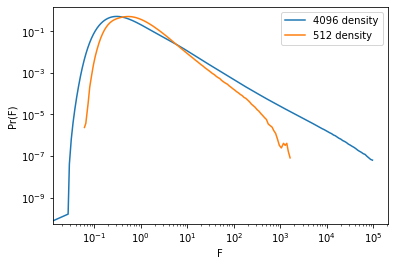

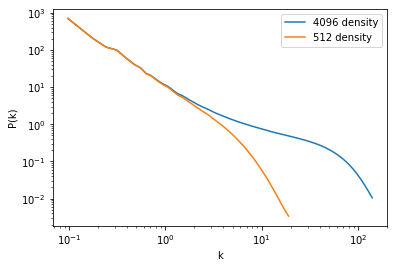

In [81]:
rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_4096rhob_pdf.txt')
raw_rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_512rhob_pdf.txt')

rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_4096rhob_ps3d.txt')
raw_rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/out_512rhob_ps3d.txt')

fig, ax = plt.subplots()
ax.plot(rho_pdf[:,2], rho_pdf[:,3], label='4096 density')
ax.plot(raw_rho_pdf[:,2][44:156], raw_rho_pdf[:,3][44:156], label='512 density')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.plot(rho_3dps[:,2], rho_3dps[:,3], label='4096 density')
ax.plot(raw_rho_3dps[:,2], raw_rho_3dps[:,3], label='512 density')

ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()


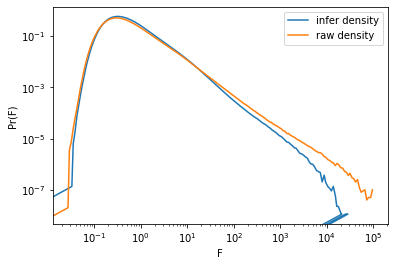

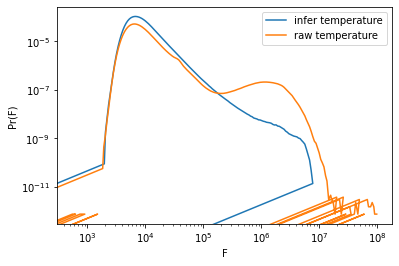

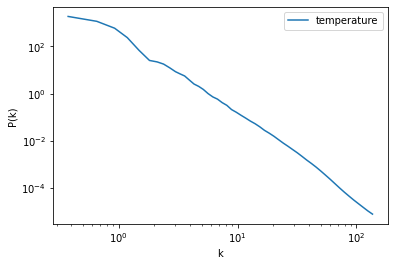

In [69]:
rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/next_out_rhob_pdf.txt')
raw_rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/raw_out_rhob_pdf.txt')
temp_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/next_out_temp_pdf.txt')
raw_temp_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/raw_out_temp_pdf.txt')

rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/next_out_rhob_ps3d.txt')
raw_rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/raw_out_rhob_ps3d.txt')
temp_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/raw_out_temp_ps3d.txt')


fig, ax = plt.subplots()
ax.plot(rho_pdf[:,2], rho_pdf[:,3], label='infer density')
ax.plot(raw_rho_pdf[:,2], raw_rho_pdf[:,3], label='raw density')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.plot(temp_pdf[:,2], temp_pdf[:,3], label='infer temperature')
ax.plot(raw_temp_pdf[:,2], raw_temp_pdf[:,3], label='raw temperature')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()


fig, ax = plt.subplots()
#ax.plot(rho_3dps[:,2], rho_3dps[:,3], label='density')
ax.plot(temp_3dps[:,2], temp_3dps[:,3], label='temperature')


ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()


In [36]:
dtype=np.single
predict = h5py.File('/pscratch/sd/c/cjacobus/ml-pm-training-2022/logs/vanilla/4GPU/00/inference_vanilla_size_512_trim_64.h5', 'r')
pred_bar = predict['native_fields']['baryon_density'][:,:,:].astype(dtype)
#pred_vx = predict['native_fields']['velocity_x'][:,:,:].astype(dtype)
#pred_vy = predict['native_fields']['velocity_y'][:,:,:].astype(dtype)
#pred_vz = predict['native_fields']['velocity_z'][:,:,:].astype(dtype)
#pred_temp = predict['native_fields']['temperature'][:,:,:].astype(dtype)

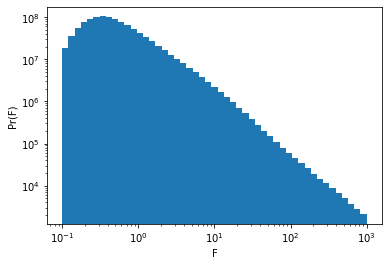

In [45]:
flat = pred_bar.flatten()
fig, ax = plt.subplots()
#ax.plot(rho_pdf[:,2], rho_pdf[:,3], label='infer density')
#ax.plot(raw_rho_pdf[:,2], raw_rho_pdf[:,3], label='raw density')

ax.hist(flat, bins=np.logspace(np.log10(0.1),np.log10(1000), 50))
#ax.plot(raw_temp_pdf[:,2], raw_temp_pdf[:,3], label='raw temperature')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.legend(loc='lower left', fontsize=tick)
fig.show()


<ipython-input-10-c7f90b300ccf>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


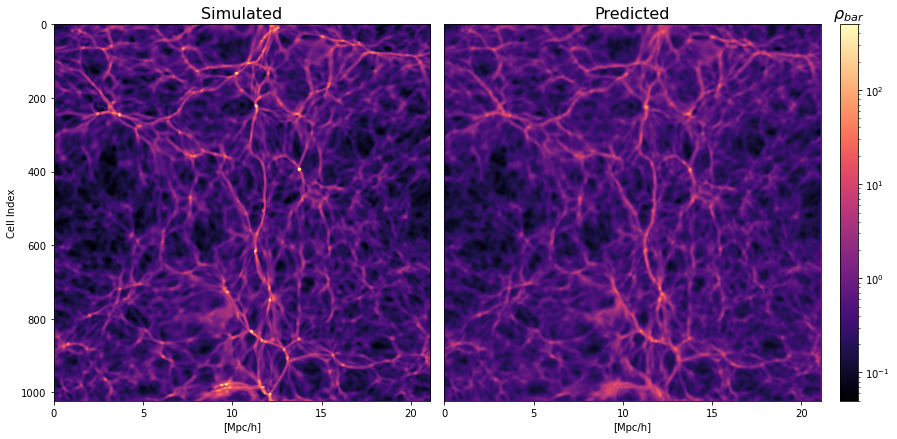

In [10]:
size = 21.09375
shape = 1024
x_label_list = ['0', '5', '10', '15', '20']

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,0.04], height_ratios=[1])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(raw_rho, cmap=cm.magma, norm=LogNorm(vmin=0.05, vmax=500))
ax0.set_title('Simulated', fontsize=16)
ax0.set_xticks([0, 5/size*shape,10/size*shape,15/size*shape,20/size*shape])
ax0.set_xticklabels(x_label_list)
ax0.set_xlabel('[Mpc/h]')
ax0.set_ylabel('Cell Index')
ax0.set_box_aspect(1)

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
im = ax1.imshow(pred_rho, cmap=cm.magma, norm=LogNorm(vmin=0.05, vmax=500))
ax1.set_box_aspect(1)
ax1.set_title('Predicted', fontsize=16)
ax1.set_xticks([0, 5/size*shape,10/size*shape,15/size*shape,20/size*shape])
ax1.set_xticklabels(x_label_list)
ax1.set_xlabel('[Mpc/h]')
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins = inset_axes(ax1,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0,
                   )

cbar1 = plt.colorbar(im, cax=axins)
axins.set_title(r'$\rho_{bar}$',fontsize=16)


plt.tight_layout()
plt.show()

In [12]:
plt.imsave('sharp_rho.png', raw_rho[0:512, 265:512+256], cmap=cm.magma, norm=LogNorm(vmin=0.05, vmax=500))

TypeError: imsave() got an unexpected keyword argument 'norm'

In [16]:
data = pred_rho[0:512, 265:512+256]
plt.imsave('blur_rho.png', ldata, cmap=cm.magma)

In [147]:
pred_path = '/pscratch/sd/z/zarija/MLHydro/fine_512.hdf5' 
#pred_path = '/pscratch/sd/z/zarija/MLHydro/L80_N512_z3_s1.hdf5'
pred = h5py.File(pred_path, 'r')
rho = np.log(pred['native_fields']['baryon_density'][0,192:320,320:448])
temp = np.log(pred['native_fields']['temperature'][0,192:320,320:448])
#tau = np.log(pred['derived_fields']['tau_real'][0,0:512,0:512])



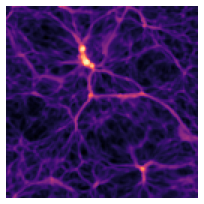

In [149]:
fig = plt.figure(figsize=(3, 3), dpi=64, frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(temp, cmap=cm.magma)
plt.imsave("temp.png", temp, cmap=cm.magma)

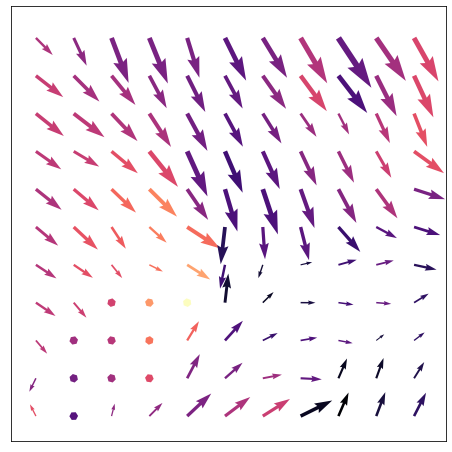

In [142]:
# Creating arrow
step=12
x = np.arange(0, 128, step)
y = np.arange(0, 128, step)
 
X, Y = np.meshgrid(x, y)
u = pred['native_fields']['velocity_x'][0,192:320:step,320:448:step]/50000000
v = pred['native_fields']['velocity_y'][0,192:320:step,320:448:step]/50000000
color = pred['native_fields']['velocity_z'][0,192:320:step,320:448:step]

# creating plot
fig, ax = plt.subplots(figsize =(14, 8))
#ax.imshow(rho, cmap=cm.magma)
ax.quiver(X, Y, u, v, color, cmap=cm.magma, width=0.02, minshaft=2, scale=8, scale_units='width')
 
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-8, 128+2, -8, 128+2])
ax.set_aspect('equal')
 
# show plot
plt.show()
fig.savefig('vel.png')

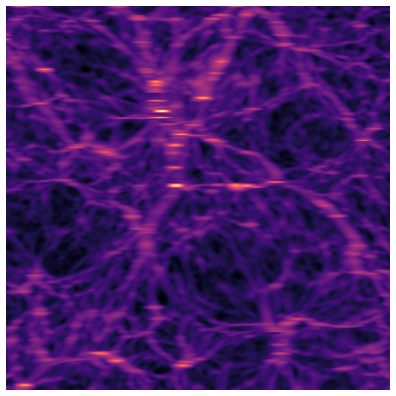

In [146]:

path = '/pscratch/sd/z/zarija/MLHydro/L80_N4096_z3_s1.hdf5'
file = h5py.File(path, 'r')

tau = np.log(file['derived_fields']['tau_real'][0,1536:2560,2560:3584])

fig = plt.figure(figsize=(6, 6), dpi=64, frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(tau, cmap=cm.magma)
plt.imsave("tau.png", tau, cmap=cm.magma)